<a href="https://colab.research.google.com/github/Nikhil5566/EDA-Repo/blob/main/Loan_Application_%26_Transaction_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df1 = pd.read_csv('loan_applications.csv')
df2 = pd.read_csv('transactions.csv')

data = pd.concat([df1, df2], ignore_index = True)

data.to_csv('data.csv', index=False)

In [5]:
data.head(11)

,application_id,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,...,merchant_category,merchant_name,transaction_location,account_balance_after_transaction,is_international_transaction,device_used,ip_address,transaction_status,transaction_source_destination,transaction_notes
0,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,2023-04-09,Business Loan,604000.0,12.0,11.66,Medical Emergency,Retired,34700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91224cec-3544-4bc7-ac15-a9792da54c02,CUST106146,2023-09-23,Car Loan,100000.0,240.0,13.62,Education,Unemployed,51600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4efcd02d-4a03-4ab7-9bd1-0ff430493d0c,CUST100674,2023-05-22,Education Loan,431000.0,60.0,11.40,Medical Emergency,Self-Employed,14800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a61337d4-ba04-4a68-b492-2cb8266e6ed7,CUST106466,2024-07-09,Car Loan,324000.0,120.0,10.36,Debt Consolidation,Self-Employed,28800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a8d1639e-170b-41b2-826a-55c7dae38d16,CUST112319,2023-11-20,Personal Loan,100000.0,36.0,14.14,Business Expansion,Salaried,43900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,d91cf990-efa1-44ad-94bf-44e6c79d1051,CUST116153,2025-02-19,Business Loan,1164000.0,24.0,9.83,Wedding,Self-Employed,72700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,cd837d7e-98de-4d26-8b6f-f59d7bef9d2a,CUST118841,2023-02-02,Personal Loan,220000.0,36.0,8.71,Vehicle Purchase,Unemployed,47300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,63e87083-c21d-4b53-856b-b58b3285b9aa,CUST109691,2022-11-05,Home Loan,475000.0,60.0,12.87,Home Renovation,Unemployed,42500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7eb31cc3-e1e7-4ef9-ae4e-b86771d60119,CUST106322,2025-05-11,Personal Loan,106000.0,120.0,10.22,Business Expansion,Business Owner,40300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,74126982-ef72-40dd-8cc3-5d441cfe7b02,CUST102418,2023-04-29,Home Loan,768000.0,240.0,7.46,Debt Consolidation,Student,59800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.tail(11)

,application_id,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,...,merchant_category,merchant_name,transaction_location,account_balance_after_transaction,is_international_transaction,device_used,ip_address,transaction_status,transaction_source_destination,transaction_notes
99989,NaN,CUST113386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Financial Services,"Chander, Sem and Ben","Hospet, Uttar Pradesh",52732.0,0.0,Web,57.200.210.122,Success,Self,Payment for Financial Services
99990,NaN,CUST104110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Electronics,"Krish, Aurora and Kakar","Srikakulam, Bihar",15954.0,0.0,POS,210.104.101.127,Success,OMAX73337269253296,Payment for Electronics
99991,NaN,CUST102786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Cash Withdrawal,"Venkataraman, Bhandari and Sampath","Bikaner, Nagaland",0.0,0.0,Mobile,112.241.241.192,Success,ZZKV84061329520638,Payment for Cash Withdrawal
99992,NaN,CUST119118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Dining,Agrawal LLC,"Chittoor, Punjab",20956.0,0.0,POS,2.222.180.225,Success,TZEJ14601909418511,Payment for Dining
99993,NaN,CUST114679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Utilities,Ram and Sons,"Machilipatnam, Meghalaya",20862.0,0.0,POS,122.37.43.86,Success,ZTNE23279188803875,Payment for Utilities
99994,NaN,CUST102970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Online Shopping,Khurana-Korpal,"Khora , Uttarakhand",12556.0,0.0,Mobile,9.198.140.228,Success,FUBK02628000713742,Payment for Online Shopping
99995,NaN,CUST115421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Healthcare,Mahal Group,"Bhagalpur, Maharashtra",0.0,0.0,ATM,204.192.254.120,Success,IOLU31003238734472,Payment for Healthcare
99996,NaN,CUST110943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Financial Services,Das LLC,"Lucknow, Chhattisgarh",38503.0,0.0,POS,11.12.241.110,Success,Self,Payment for Financial Services
99997,NaN,CUST107349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Electronics,Jaggi LLC,"Thane, Uttar Pradesh",23742.0,0.0,ATM,82.197.51.173,Success,Self,Payment for Electronics
99998,NaN,CUST104844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Groceries,Chada-Saha,"Madurai, Rajasthan",39525.0,0.0,Web,141.203.188.201,Success,XDYI12622969504246,Payment for Groceries


In [8]:
data.shape

(100000, 35)

In [9]:
data.columns

Index(['application_id', 'customer_id', 'application_date', 'loan_type',
       'loan_amount_requested', 'loan_tenure_months', 'interest_rate_offered',
       'purpose_of_loan', 'employment_status', 'monthly_income', 'cibil_score',
       'existing_emis_monthly', 'debt_to_income_ratio',
       'property_ownership_status', 'residential_address', 'applicant_age',
       'gender', 'number_of_dependents', 'loan_status', 'fraud_flag',
       'fraud_type', 'transaction_id', 'transaction_date', 'transaction_type',
       'transaction_amount', 'merchant_category', 'merchant_name',
       'transaction_location', 'account_balance_after_transaction',
       'is_international_transaction', 'device_used', 'ip_address',
       'transaction_status', 'transaction_source_destination',
       'transaction_notes'],
      dtype='object')

In [10]:
data.dtypes

,0
application_id,object
customer_id,object
application_date,object
loan_type,object
loan_amount_requested,float64
loan_tenure_months,float64
interest_rate_offered,float64
purpose_of_loan,object
employment_status,object
monthly_income,float64


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   application_id                     50000 non-null   object 
 1   customer_id                        100000 non-null  object 
 2   application_date                   50000 non-null   object 
 3   loan_type                          50000 non-null   object 
 4   loan_amount_requested              50000 non-null   float64
 5   loan_tenure_months                 50000 non-null   float64
 6   interest_rate_offered              50000 non-null   float64
 7   purpose_of_loan                    50000 non-null   object 
 8   employment_status                  50000 non-null   object 
 9   monthly_income                     50000 non-null   float64
 10  cibil_score                        50000 non-null   float64
 11  existing_emis_monthly              50000

In [13]:
data.isnull().sum()

,0
application_id,50000
customer_id,0
application_date,50000
loan_type,50000
loan_amount_requested,50000
loan_tenure_months,50000
interest_rate_offered,50000
purpose_of_loan,50000
employment_status,50000
monthly_income,50000


# Handling Missing Values:


In [15]:
# Define numerical and categorical columns based on your DataFrame's dtypes
numerical_cols = data.select_dtypes(include=np.number).columns
categorical_cols = data.select_dtypes(exclude=np.number).columns

for col in numerical_cols:
    if data[col].isnull().any():
        data[col].fillna(data[col].mean(), inplace=True)

# For categorical columns, you might impute with the mode or a constant
for col in categorical_cols:
    if data[col].isnull().any():
        data[col].fillna(data[col].mode()[0], inplace=True)

print("\nMissing values after handling:")
print(data.isnull().sum())


Missing values after handling:
application_id                       0
customer_id                          0
application_date                     0
loan_type                            0
loan_amount_requested                0
loan_tenure_months                   0
interest_rate_offered                0
purpose_of_loan                      0
employment_status                    0
monthly_income                       0
cibil_score                          0
existing_emis_monthly                0
debt_to_income_ratio                 0
property_ownership_status            0
residential_address                  0
applicant_age                        0
gender                               0
number_of_dependents                 0
loan_status                          0
fraud_flag                           0
fraud_type                           0
transaction_id                       0
transaction_date                     0
transaction_type                     0
transaction_amount              

In [17]:
data.duplicated().sum()

np.int64(0)

# Handling Outliners

In [19]:
Q1 = data['loan_amount_requested'].quantile(0.25)
Q3 = data['loan_amount_requested'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR

data_outliers = data[(data['loan_amount_requested'] < lower_bound) | (data['loan_amount_requested'] > upper_bound)].copy()

print('Before removing outliers:', data.shape)
print('After removing outliers:', data_outliers.shape)

Before removing outliers: (100000, 35)
After removing outliers: (99293, 35)


# Univariate Analysis

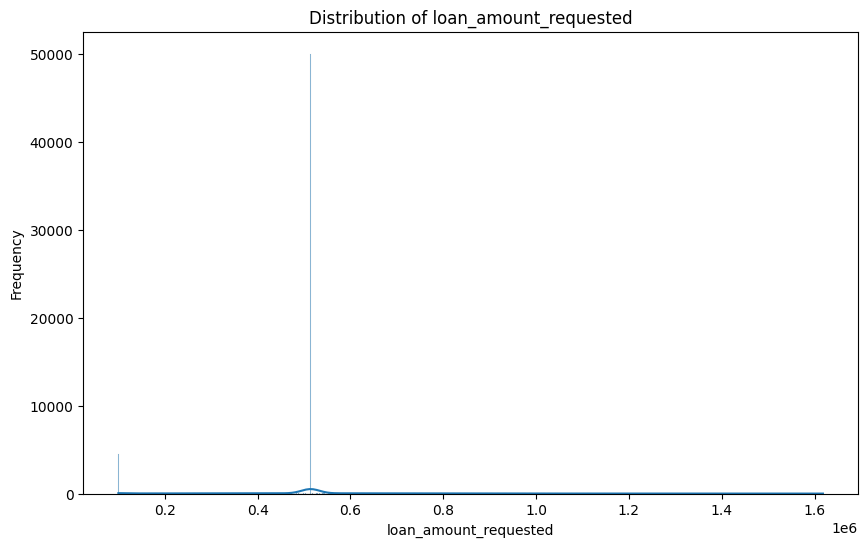

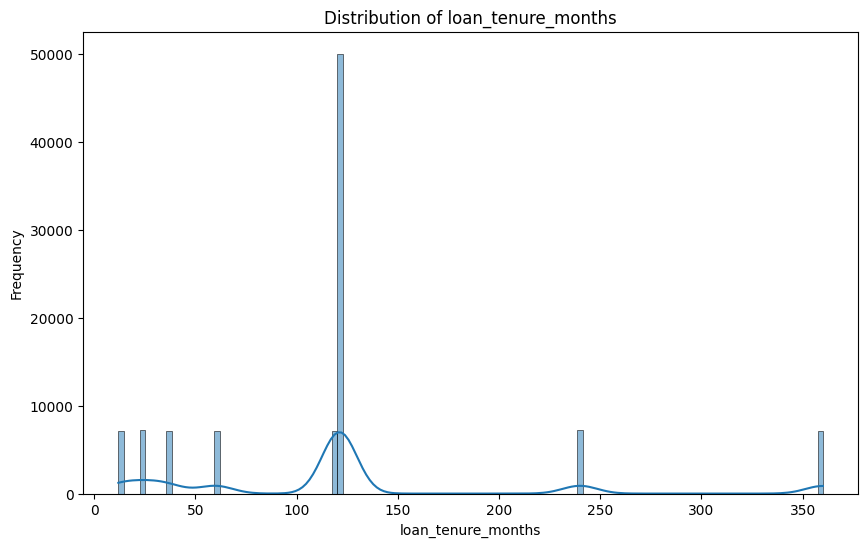

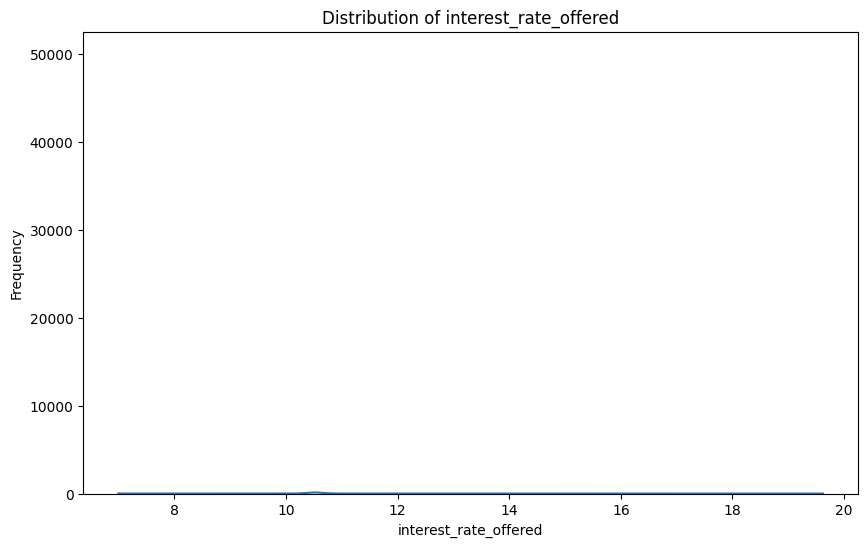

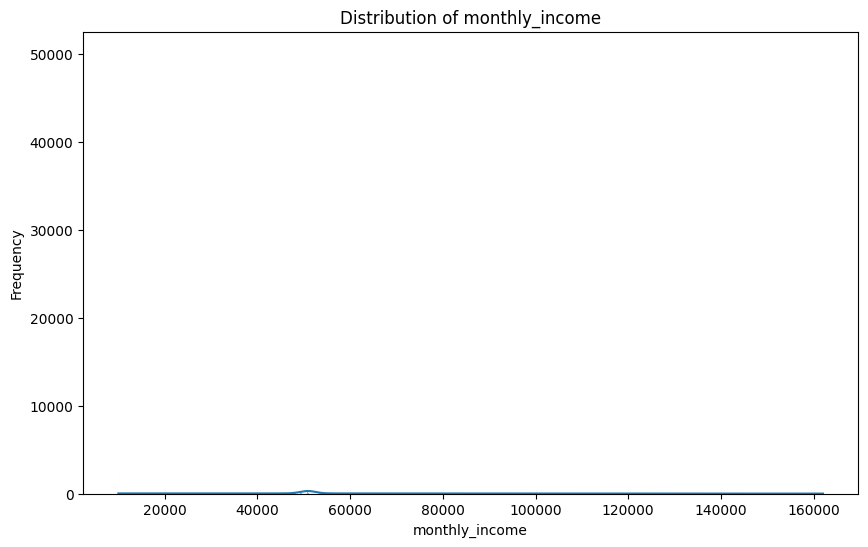

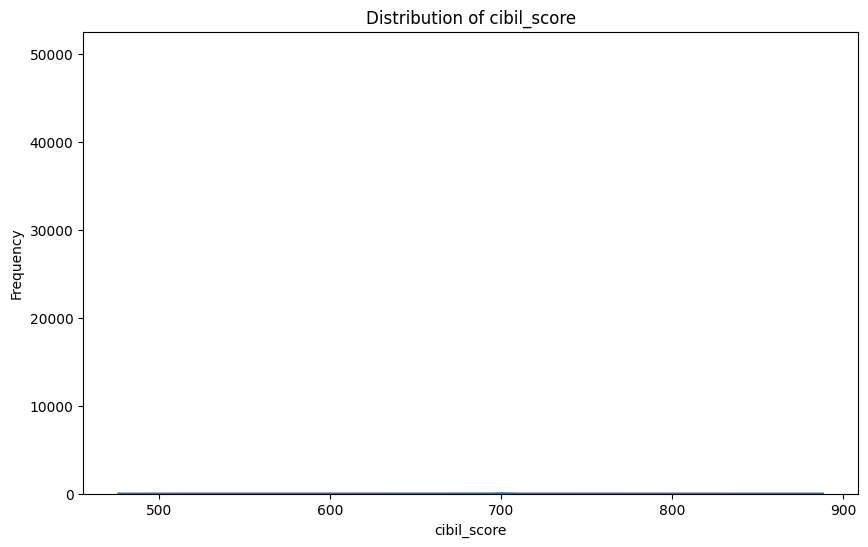

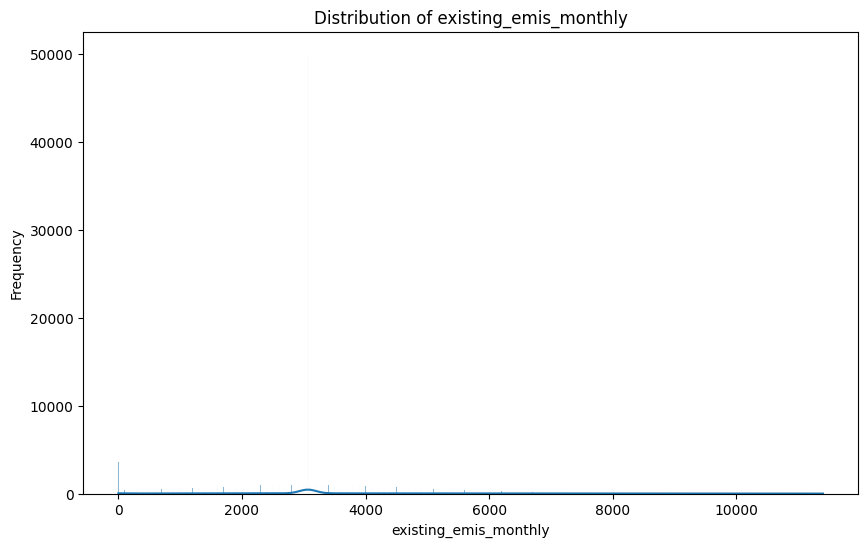

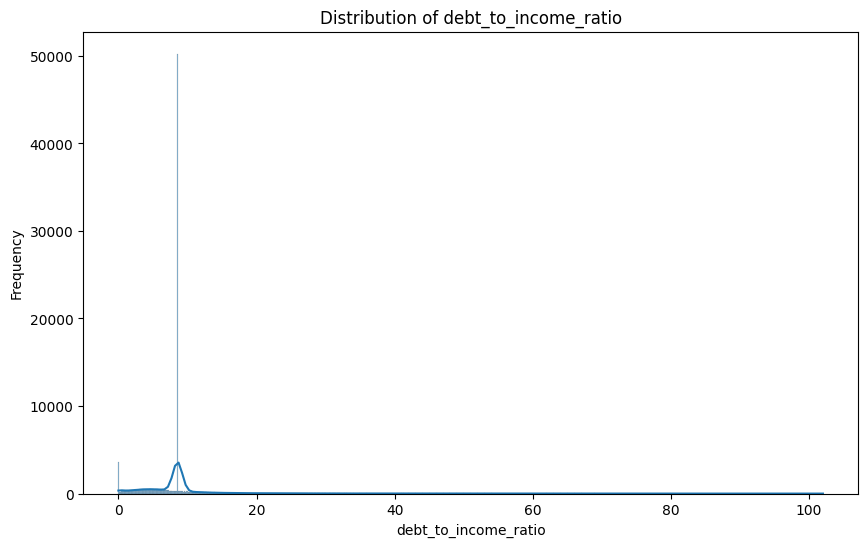

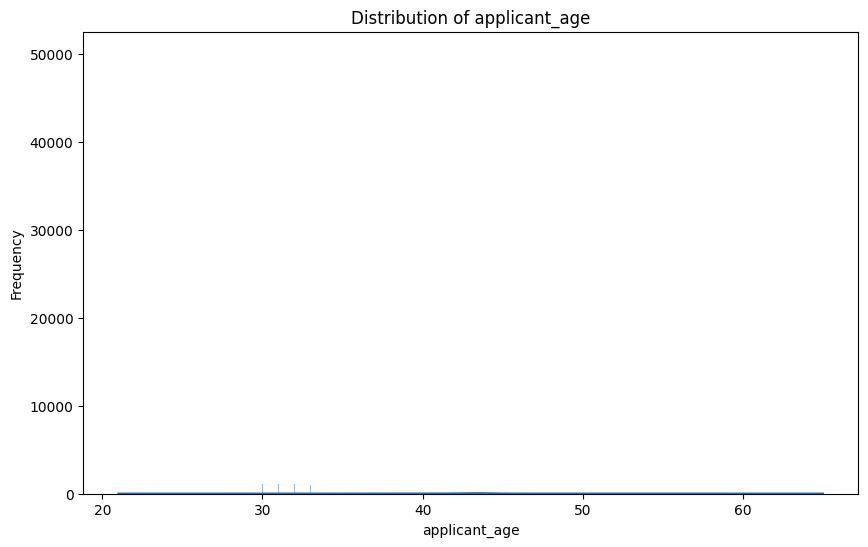

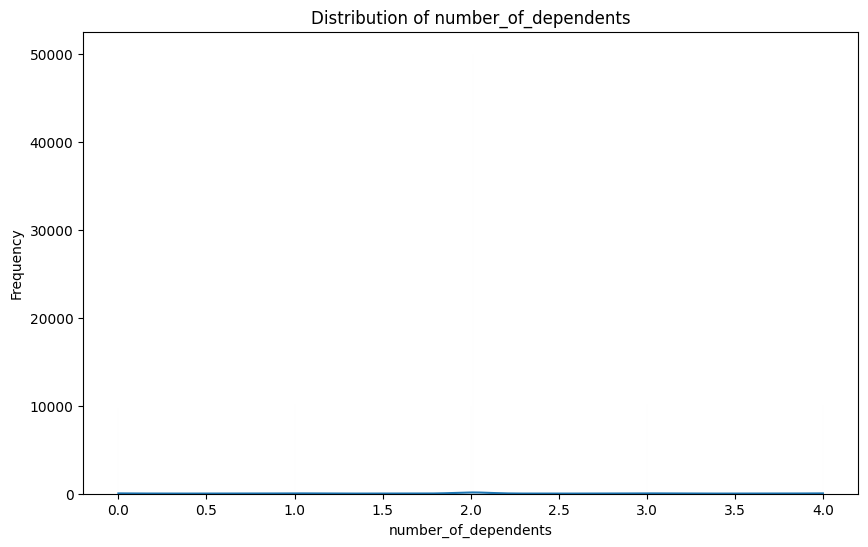

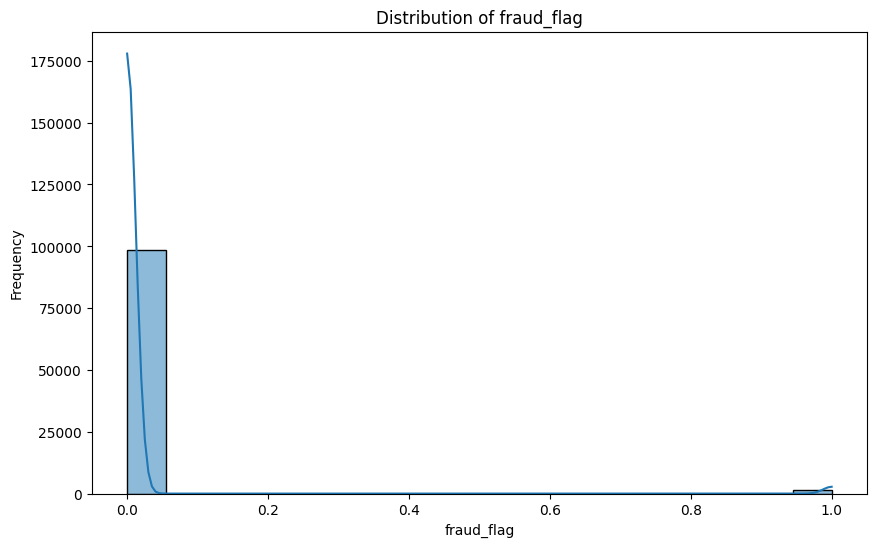

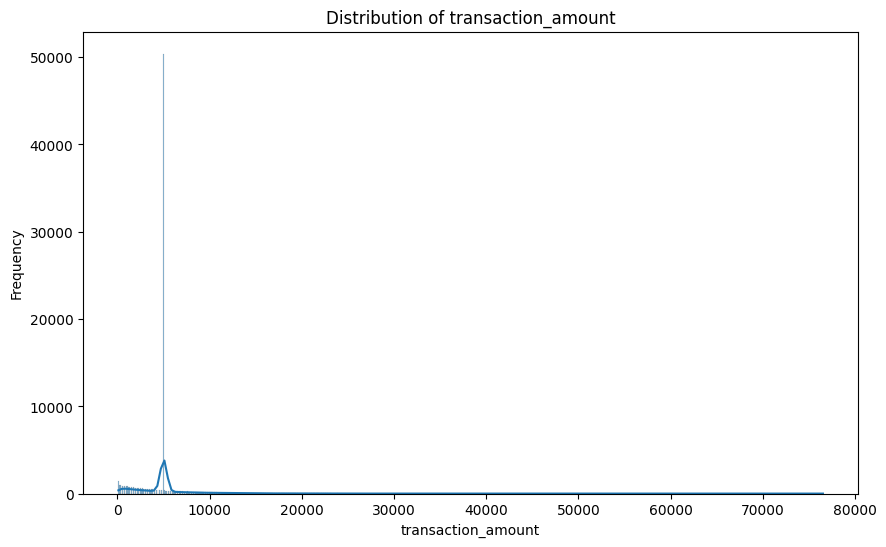

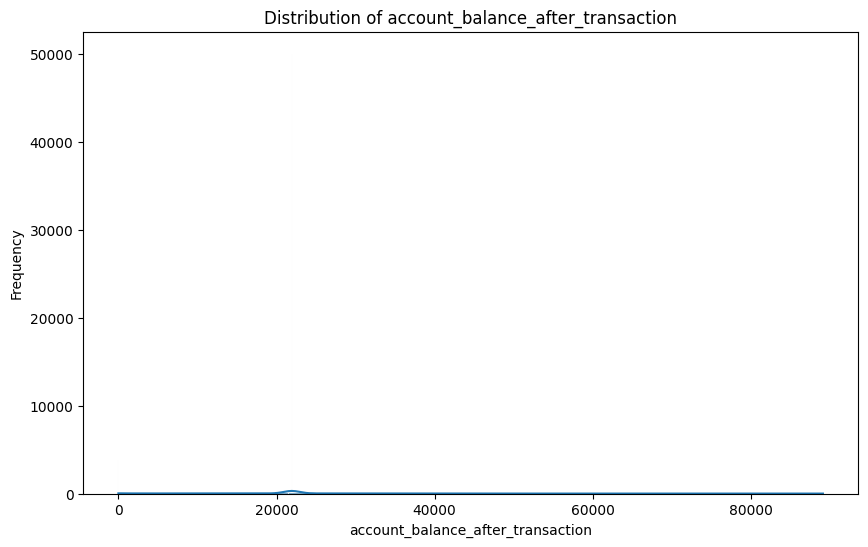

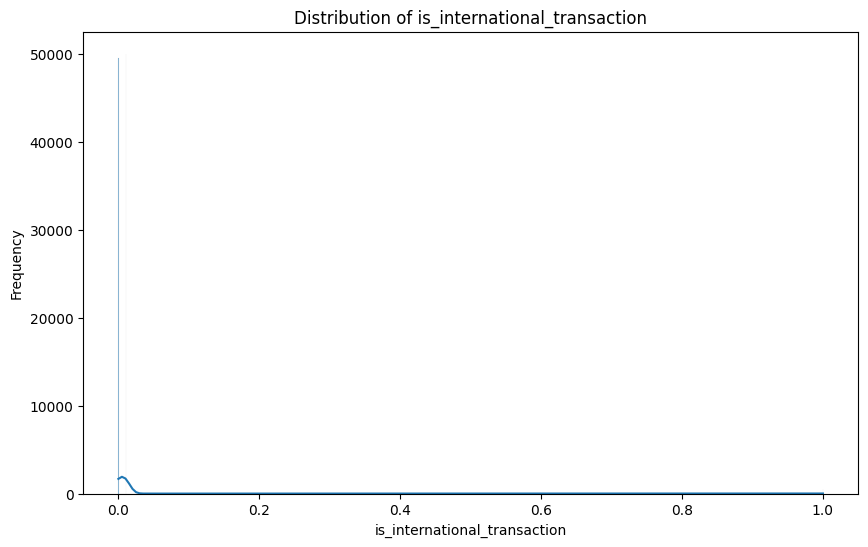

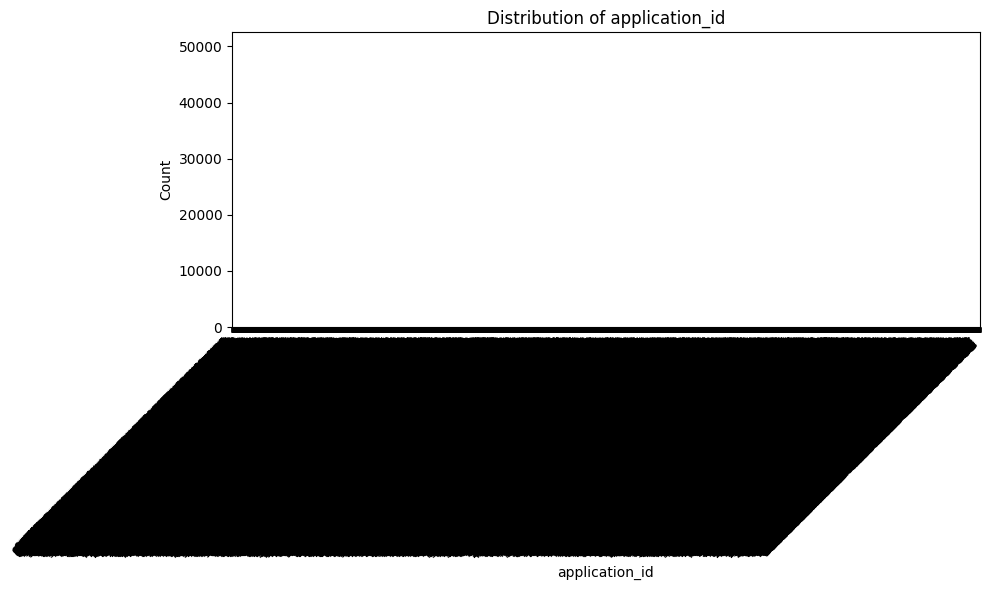

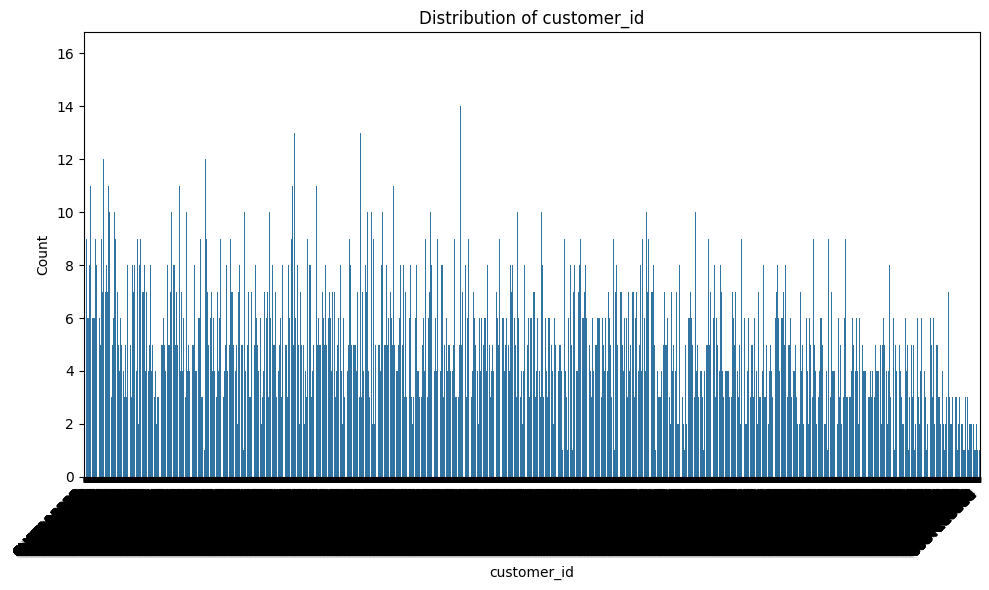

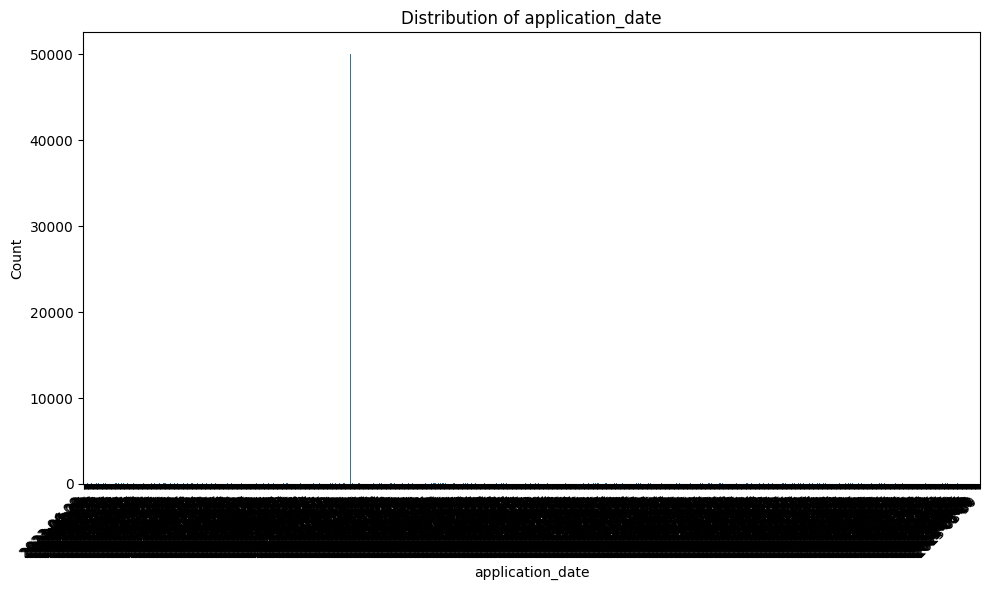

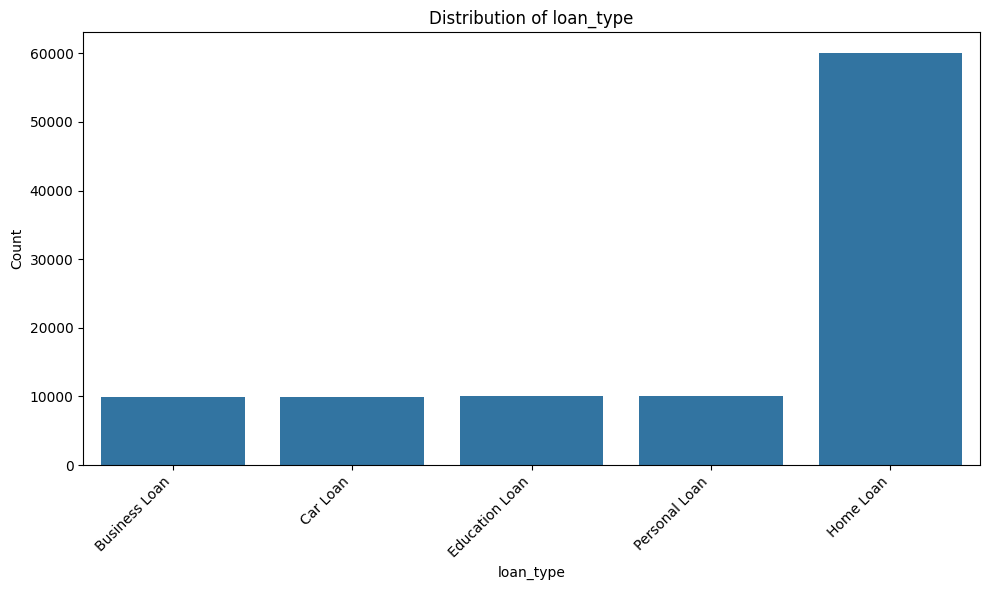

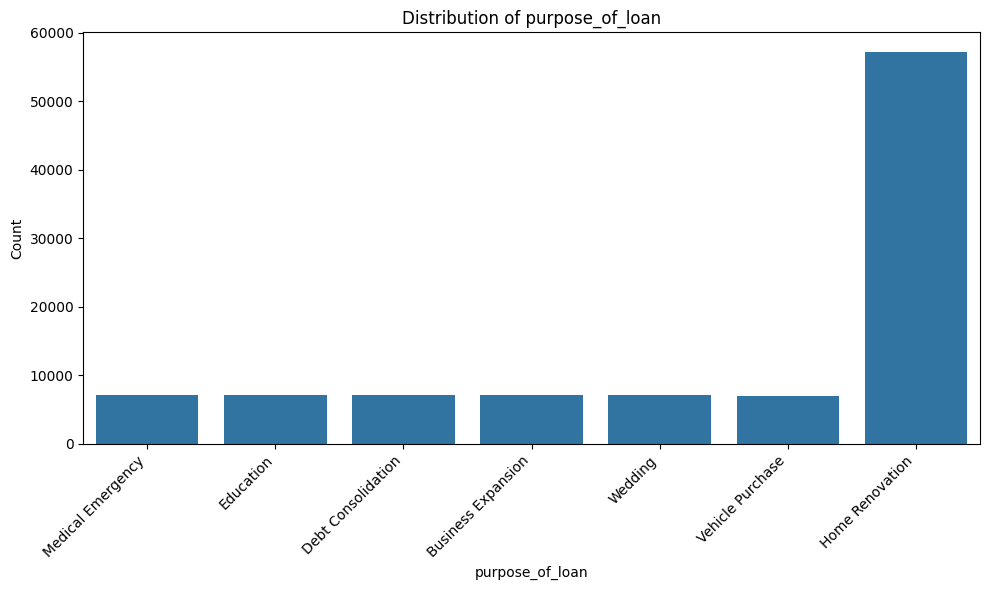

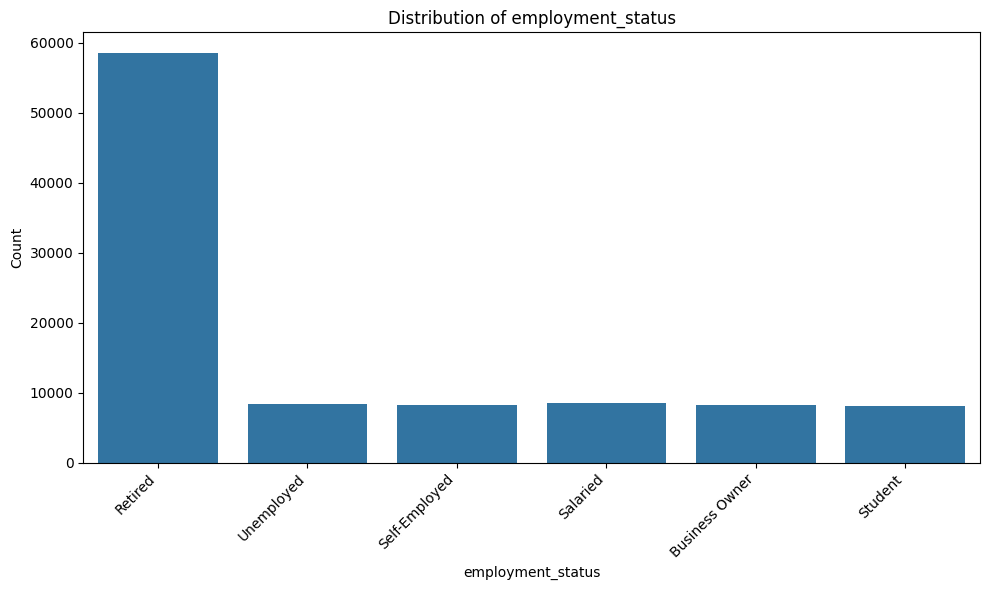

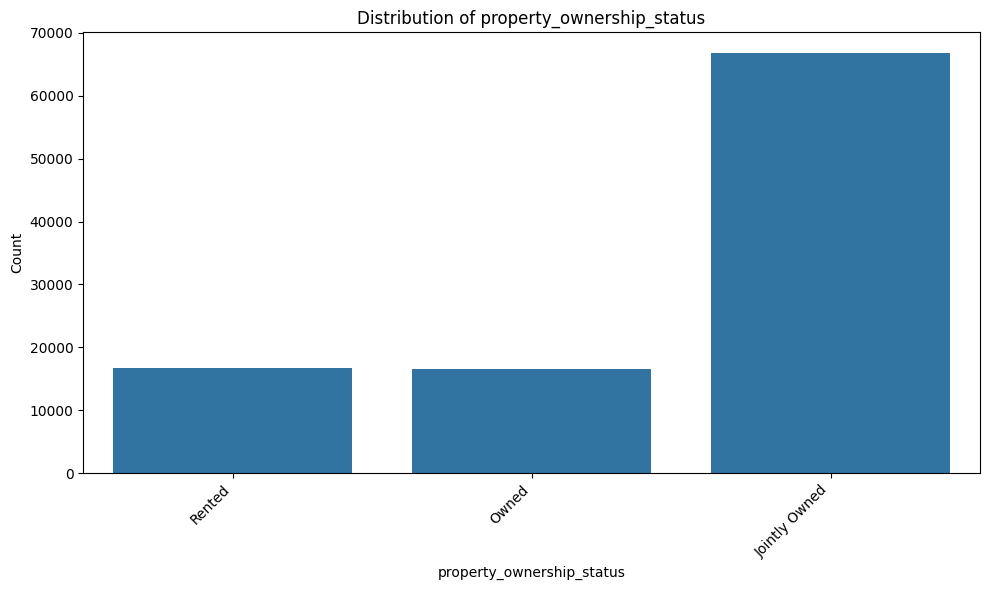

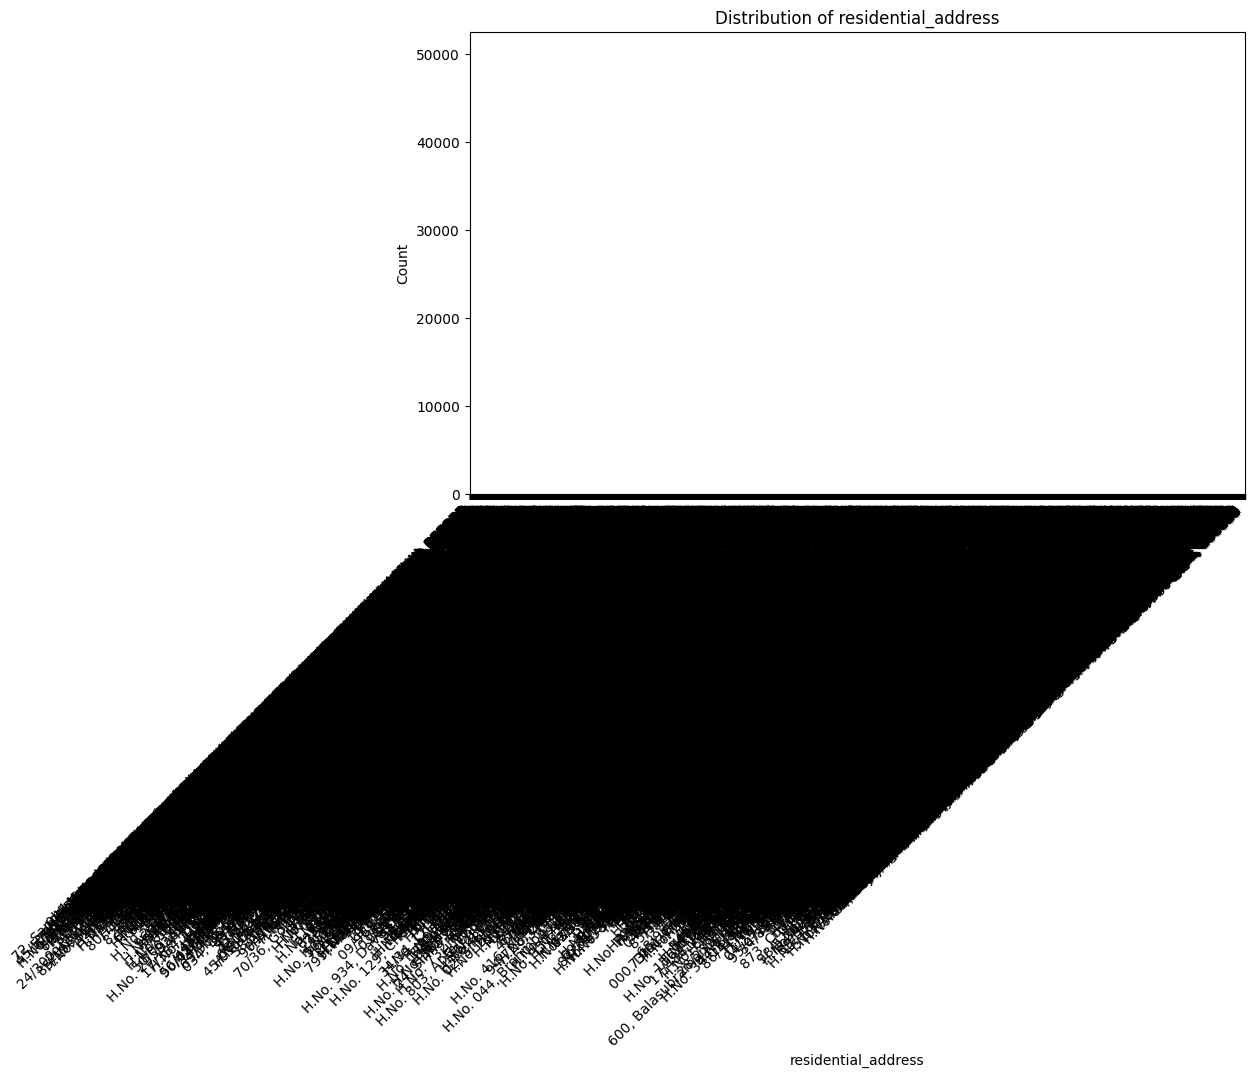

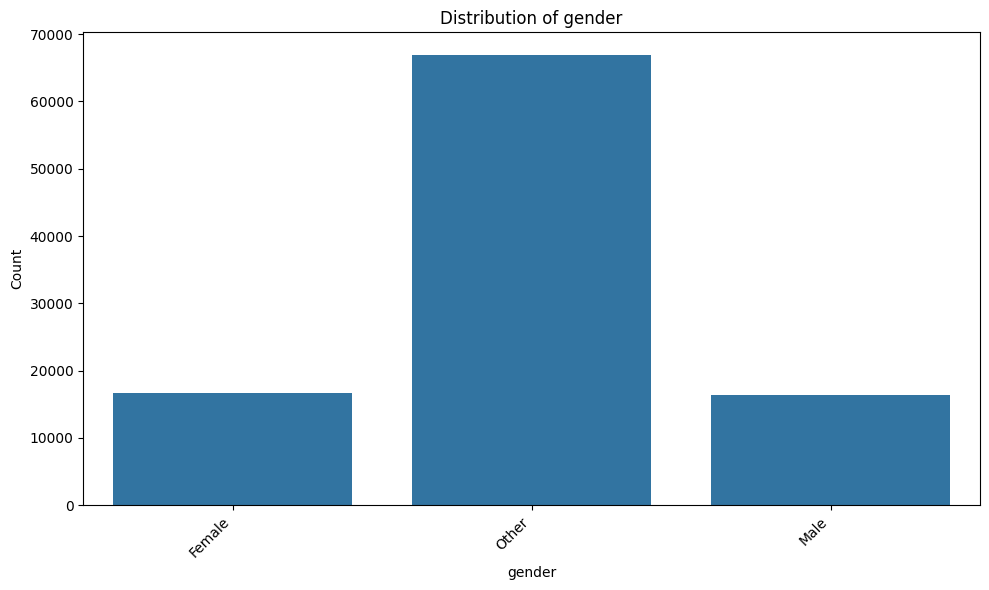

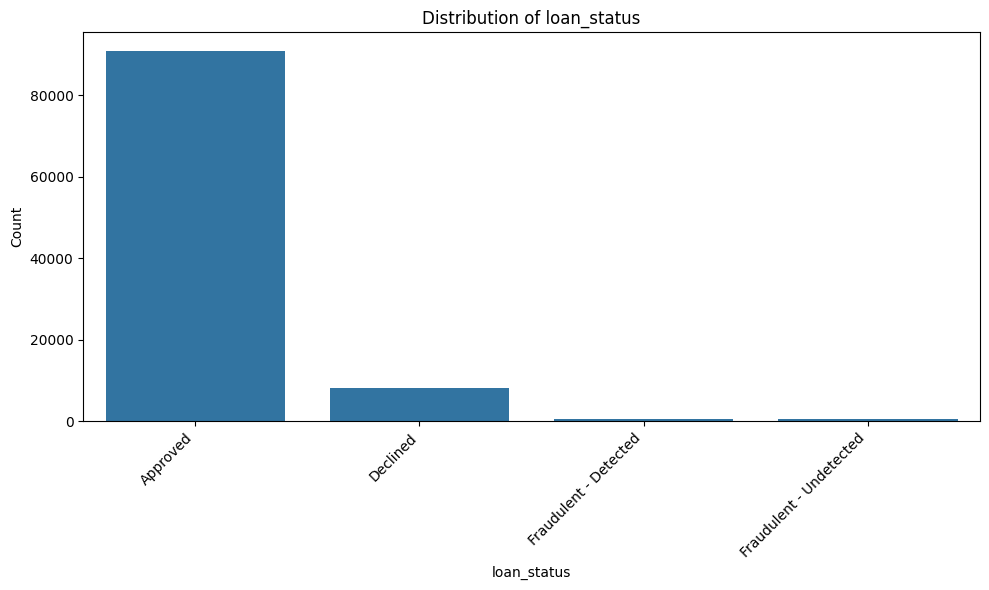

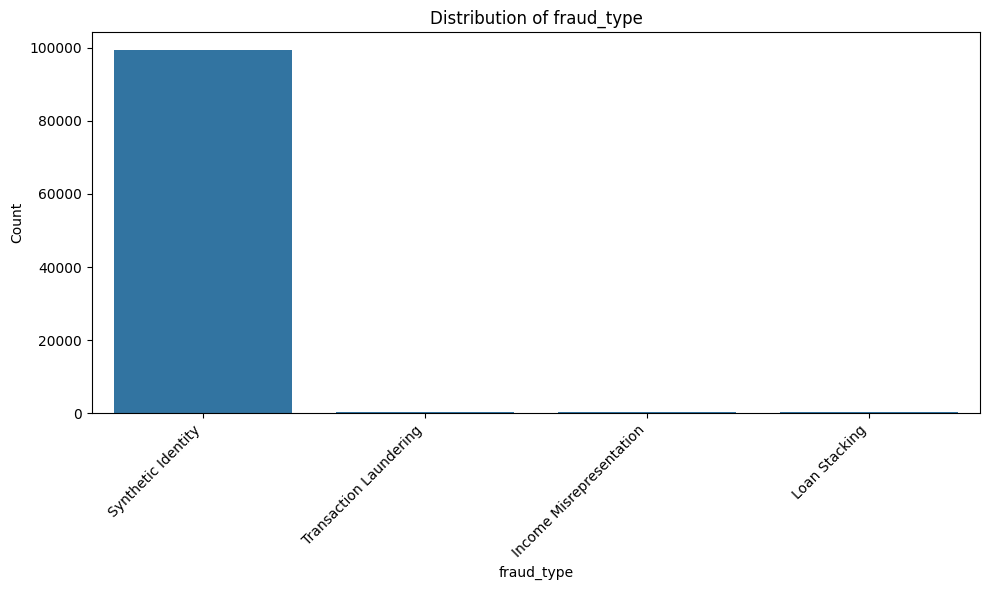

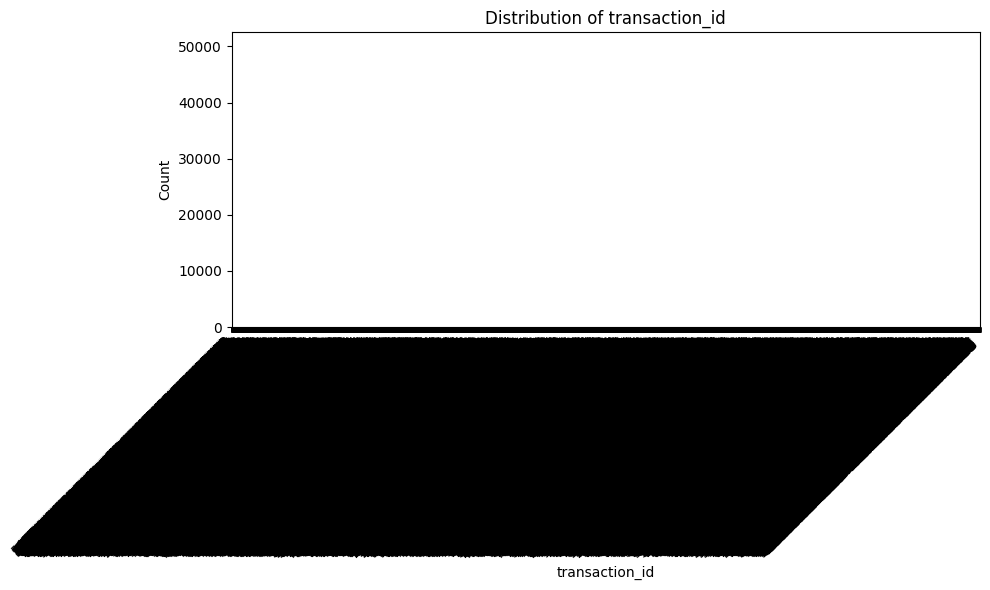

KeyboardInterrupt: 

In [22]:
# Get a list of numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

# Iterate through numerical columns and create histograms
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Get a list of categorical columns
categorical_cols = data.select_dtypes(include='object').columns.tolist()

# Iterate through categorical columns and create countplots
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

# You can also use value_counts for a quick look at categorical data distribution
for col in categorical_cols:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

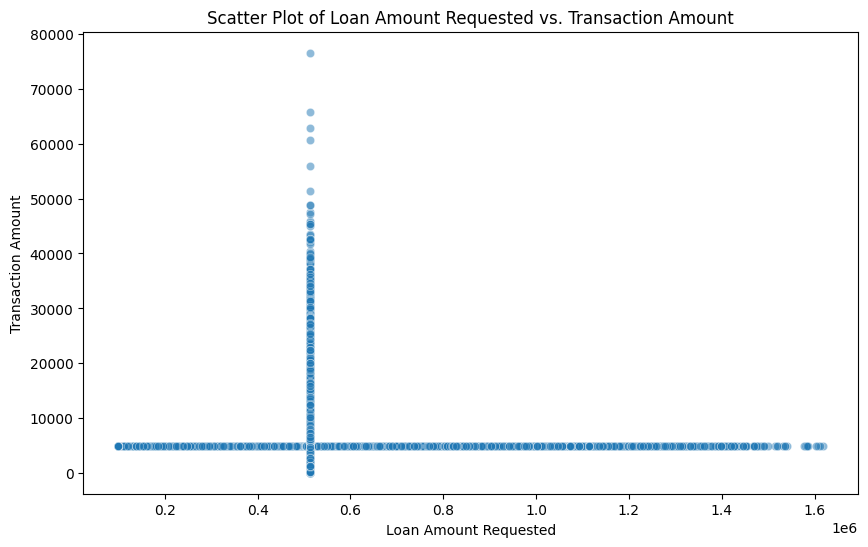

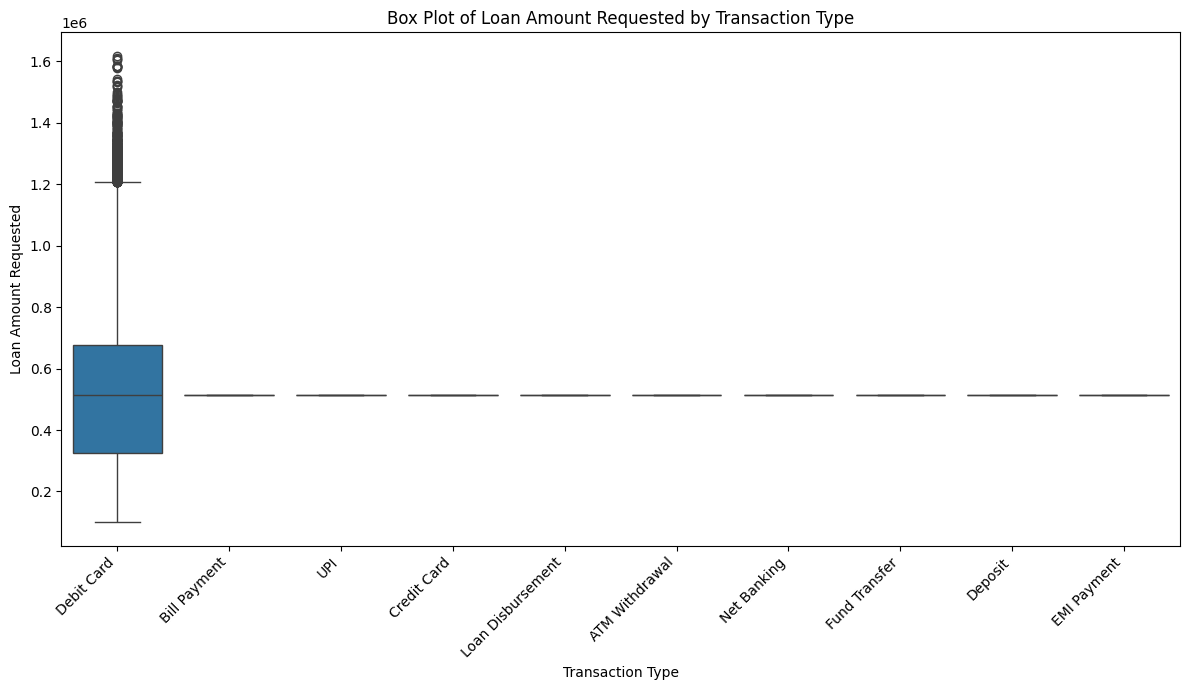

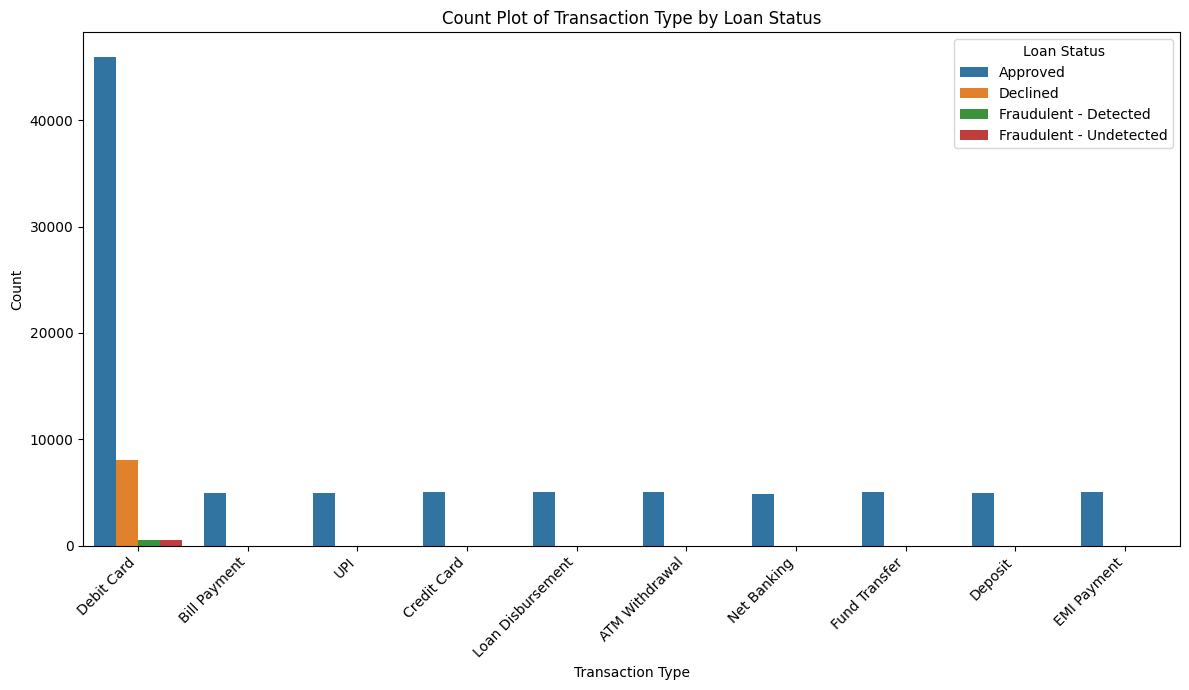

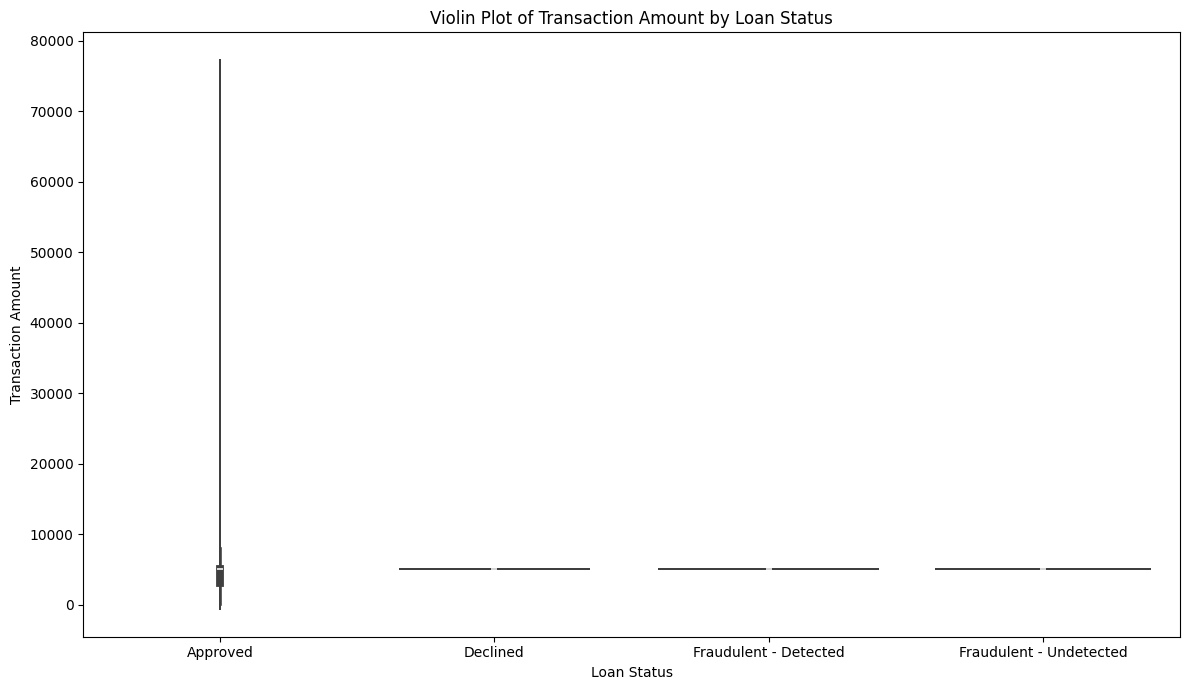

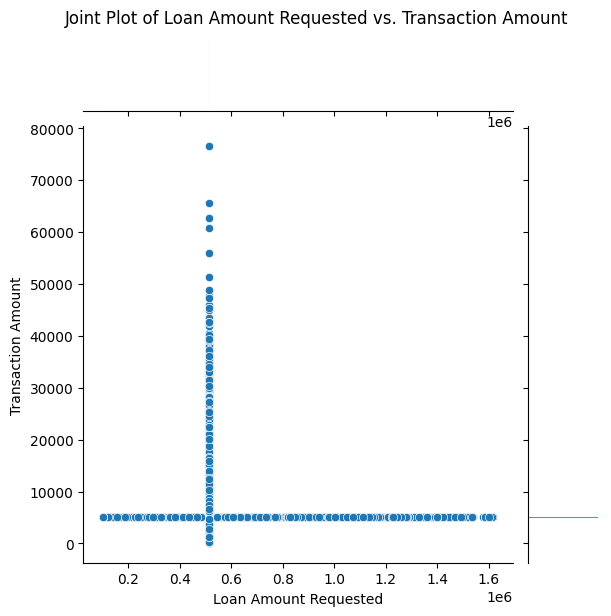

In [23]:
# Bivariate Analysis Visualizations

# 1. Scatter plot: Relationship between two numerical variables (e.g., loan_amount_requested and transaction_amount)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='loan_amount_requested', y='transaction_amount', alpha=0.5)
plt.title('Scatter Plot of Loan Amount Requested vs. Transaction Amount')
plt.xlabel('Loan Amount Requested')
plt.ylabel('Transaction Amount')
plt.show()

# 2. Box plot: Relationship between a numerical variable and a categorical variable (e.g., loan_amount_requested and transaction_type)
# You might need to adjust the x-axis labels if there are many unique transaction types
plt.figure(figsize=(12, 7))
sns.boxplot(data=data, x='transaction_type', y='loan_amount_requested')
plt.title('Box Plot of Loan Amount Requested by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Loan Amount Requested')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Bar plot: Relationship between two categorical variables (e.g., transaction_type and loan_status)
# You might need to handle potential missing values in 'loan_status' if they exist
plt.figure(figsize=(12, 7))
# Fill NaN values in 'loan_status' before plotting if necessary
data['loan_status'].fillna('Unknown', inplace=True)
sns.countplot(data=data, x='transaction_type', hue='loan_status')
plt.title('Count Plot of Transaction Type by Loan Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

# 4. Violin plot: Similar to box plot, shows distribution shape (e.g., transaction_amount and loan_status)
plt.figure(figsize=(12, 7))
# Fill NaN values in 'loan_status' before plotting if necessary
data['loan_status'].fillna('Unknown', inplace=True)
sns.violinplot(data=data, x='loan_status', y='transaction_amount')
plt.title('Violin Plot of Transaction Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()


sns.jointplot(data=data, x='loan_amount_requested', y='transaction_amount', kind='scatter')
plt.suptitle('Joint Plot of Loan Amount Requested vs. Transaction Amount', y=1.02) # Adjust title position
plt.xlabel('Loan Amount Requested')
plt.ylabel('Transaction Amount')
plt.show()

# Thank you